In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

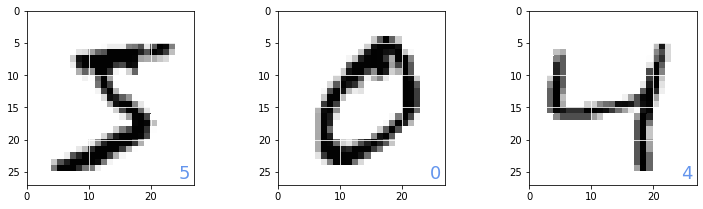

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

In [3]:
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255 # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) 

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() 
model.add(Dense(16, input_dim=784, activation='sigmoid')) 
model.add(Dense(10, activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])

In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 12ms/step - loss: 2.0843 - accuracy: 0.3663 - val_loss: 1.7996 - val_accuracy: 0.5944
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.6295 - accuracy: 0.6626 - val_loss: 1.4534 - val_accuracy: 0.7180
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 1.3448 - accuracy: 0.7398 - val_loss: 1.2170 - val_accuracy: 0.7769
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 1.1391 - accuracy: 0.7882 - val_loss: 1.0393 - val_accuracy: 0.8151
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9800 - accuracy: 0.8213 - val_loss: 0.8992 - val_accuracy: 0.8393
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.8538 - accuracy: 0.8448 - val_loss: 0.7877 - val_accuracy: 0.8564
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.7528 - accuracy: 0.8596 - val_loss: 0.6985 - val_accuracy: 0.8698
Epoch 8/10
60/60 [=

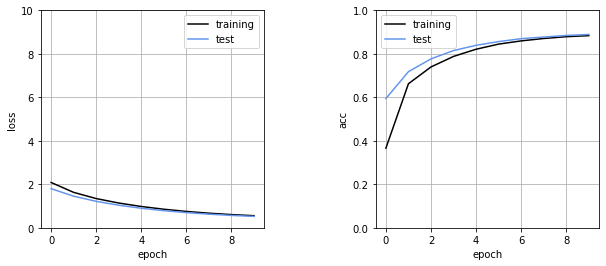

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

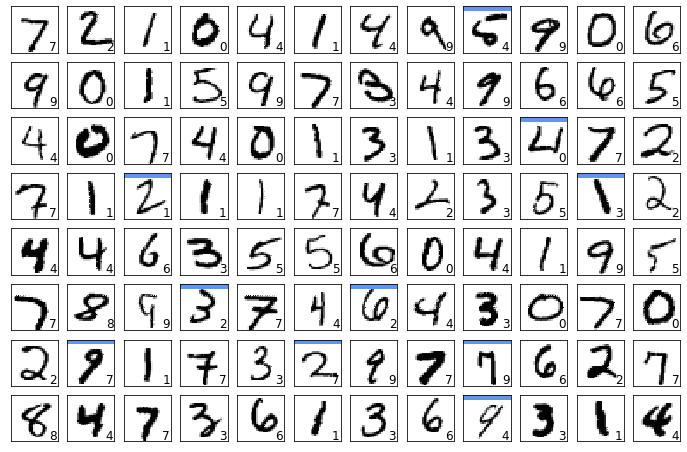

In [8]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) 
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
show_prediction()
plt.show()

In [9]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4423 - accuracy: 0.5878 - val_loss: 0.7833 - val_accuracy: 0.8232
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.5950 - accuracy: 0.8580 - val_loss: 0.4589 - val_accuracy: 0.8865
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 0.4272 - accuracy: 0.8877 - val_loss: 0.3761 - val_accuracy: 0.8990
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3669 - accuracy: 0.8993 - val_loss: 0.3358 - val_accuracy: 0.9083
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3331 - accuracy: 0.9076 - val_loss: 0.3117 - val_accuracy: 0.9136
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3102 - accuracy: 0.9139 - val_loss: 0.2957 - val_accuracy: 0.9166
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2935 - accuracy: 0.9184 - val_loss: 0.2817 - val_accuracy: 0.9207
Epoch 8/10
60/60 [==

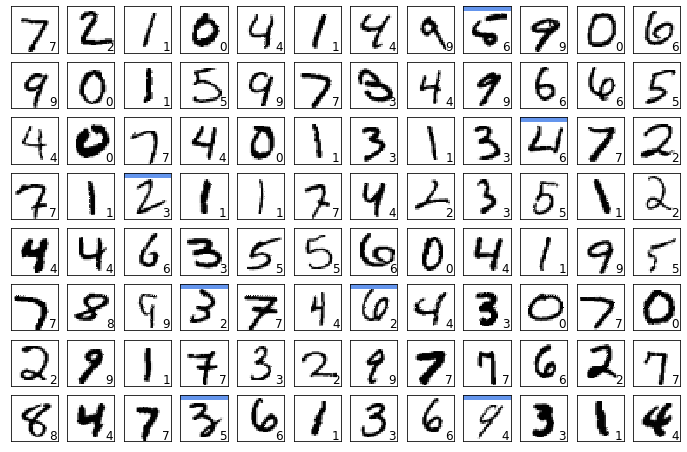

In [10]:
show_prediction()
plt.show()

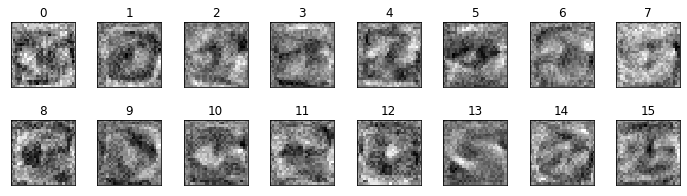

In [11]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

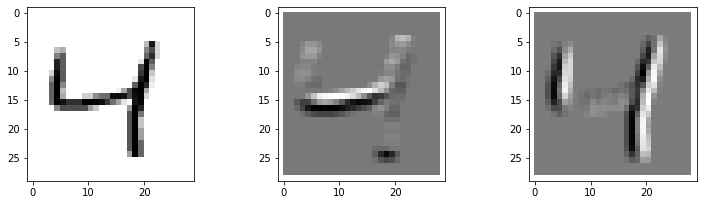

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) 
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) 

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [15]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten()) 
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 7s 115ms/step - loss: 0.7756 - accuracy: 0.8096 - val_loss: 0.3390 - val_accuracy: 0.9061
Epoch 2/20
60/60 [==============================] - 7s 111ms/step - loss: 0.3133 - accuracy: 0.9113 - val_loss: 0.2704 - val_accuracy: 0.9224
Epoch 3/20
60/60 [==============================] - 7s 113ms/step - loss: 0.2593 - accuracy: 0.9267 - val_loss: 0.2324 - val_accuracy: 0.9366
Epoch 4/20
60/60 [==============================] - 7s 114ms/step - loss: 0.2240 - accuracy: 0.9368 - val_loss: 0.2029 - val_accuracy: 0.9425
Epoch 5/20
60/60 [==============================] - 7s 119ms/step - loss: 0.1947 - accuracy: 0.9454 - val_loss: 0.1778 - val_accuracy: 0.9490
Epoch 6/20
60/60 [==============================] - 8s 131ms/step - loss: 0.1705 - accuracy: 0.9522 - val_loss: 0.1585 - val_accuracy: 0.9553
Epoch 7/20
60/60 [==============================] - 8s 134ms/step - loss: 0.1506 - accuracy: 0.9583 - val_loss: 0.1427 - val_accuracy: 0.9600
Epoch 

In [16]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) 
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

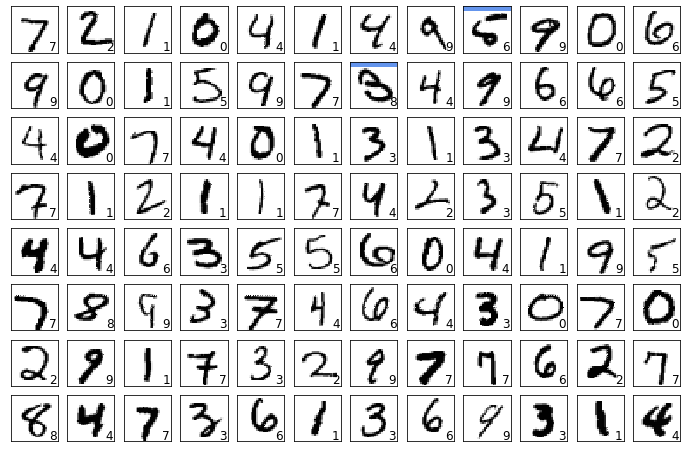

In [17]:
show_prediction()
plt.show()

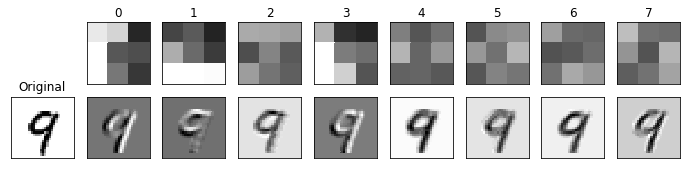

In [18]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] 
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)

    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [19]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) 
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 72s 1s/step - loss: 0.7134 - accuracy: 0.7786 - val_loss: 0.1402 - val_accuracy: 0.9576
Epoch 2/20
60/60 [==============================] - 69s 1s/step - loss: 0.1432 - accuracy: 0.9571 - val_loss: 0.0681 - val_accuracy: 0.9789
Epoch 3/20
60/60 [==============================] - 60s 993ms/step - loss: 0.0918 - accuracy: 0.9715 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 4/20
60/60 [==============================] - 49s 819ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0395 - val_accuracy: 0.9872
Epoch 5/20
60/60 [==============================] - 57s 955ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 6/20
60/60 [==============================] - 53s 883ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 7/20
60/60 [==============================] - 51s 847ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch

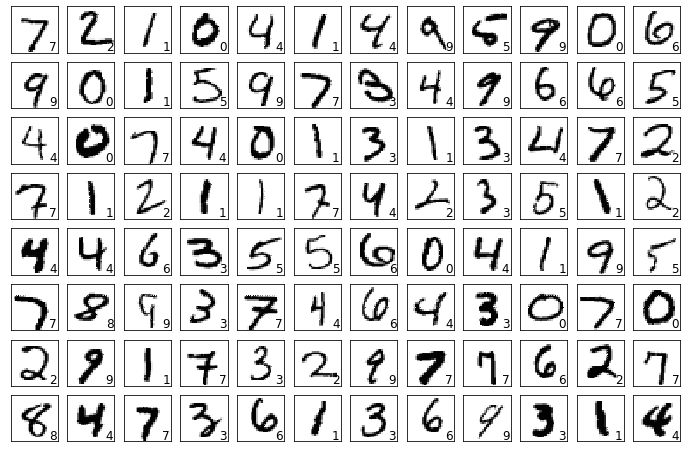

In [20]:
show_prediction()
plt.show()